# Data Mining and Visualization (83676)
# Final Project
## Part 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


### 1.1 Show the data information, e.g., types of attributes, the attributes values etc.


In [2]:
df = pd.read_csv("Marketing_Campaign_Train.csv") # import the data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

### 1.2 Show the data statistics, e.g., distribution, skewness, median and more

#### Distributions:

##### Non-Numeric Values:

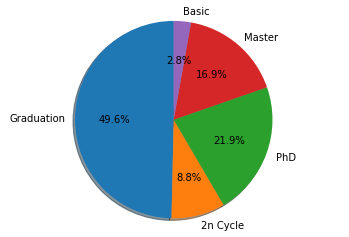

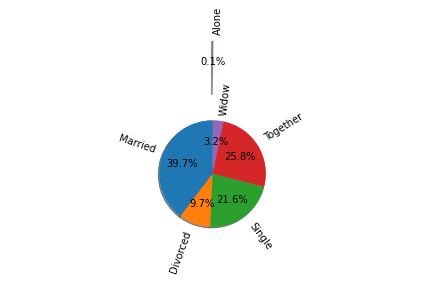

<AxesSubplot:xlabel='Status', ylabel='Count'>

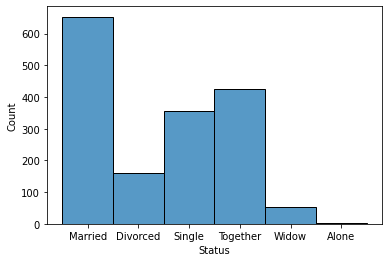

In [3]:

labels = df["Education"].dropna().unique()
sizes = [df[df.Education == cret].shape[0] for cret in labels]

fig1, ax1 = plt.subplots()
fig1.set_facecolor('w')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

labels = df["Status"].dropna().unique()
sizes = [df[df.Status == cret].shape[0] for cret in labels]
explodes = [0,0,0,0,0,1.5]
fig1, ax1 = plt.subplots()
fig1.set_facecolor('w')
ax1.pie(sizes,explode=explodes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, rotatelabels=True)
ax1.axis('equal') 
plt.tight_layout()
plt.show()

plt.figure(1)
sns.histplot(df["Status"].dropna())



##### Numeric Values:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\1840353626.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


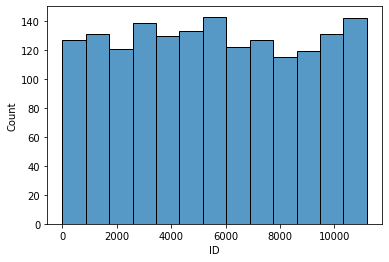

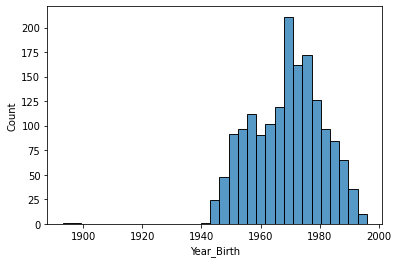

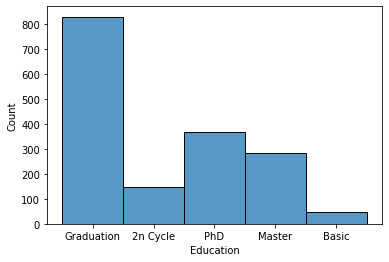

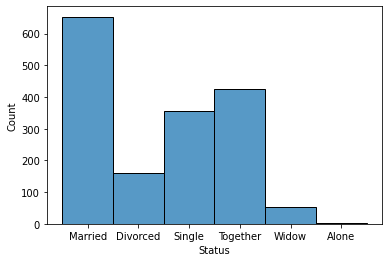

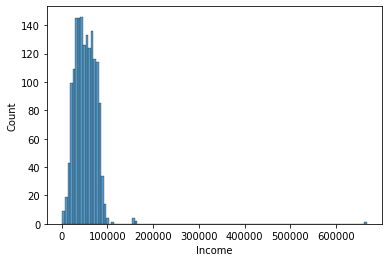

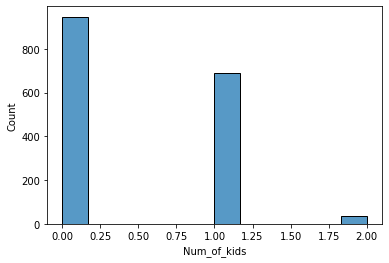

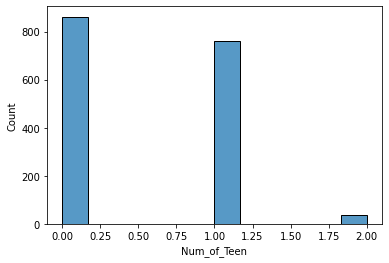

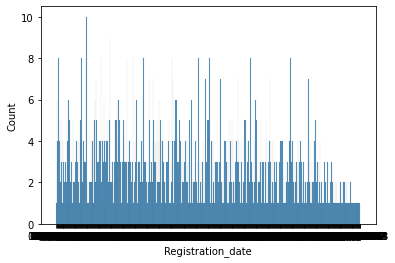

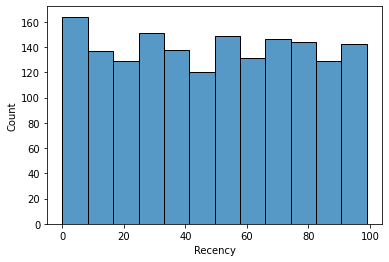

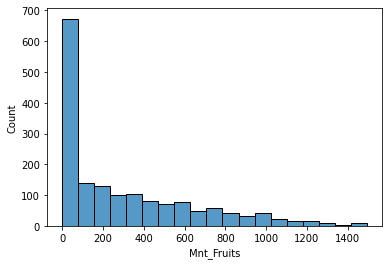

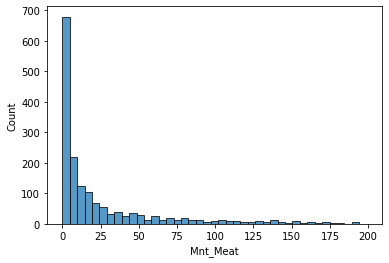

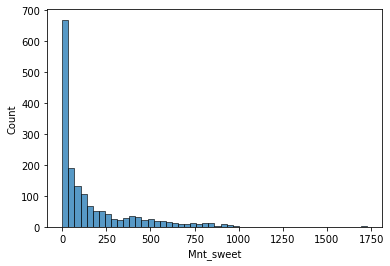

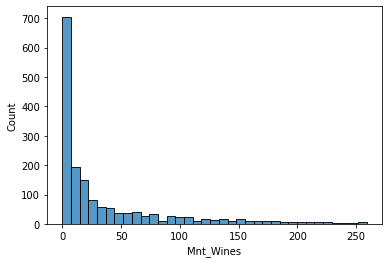

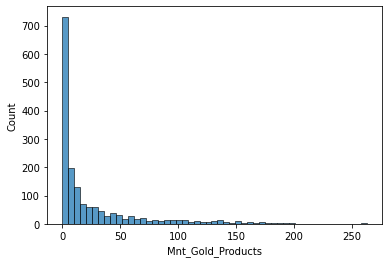

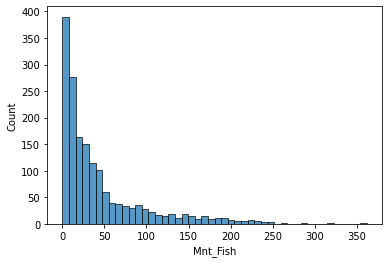

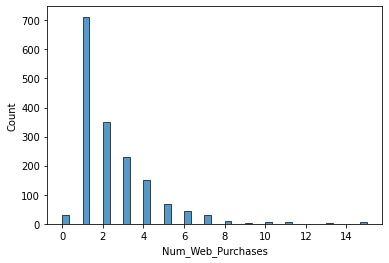

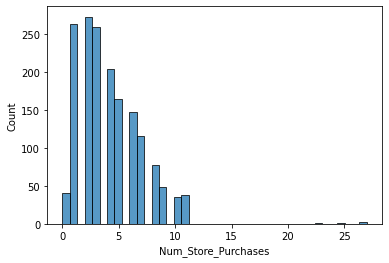

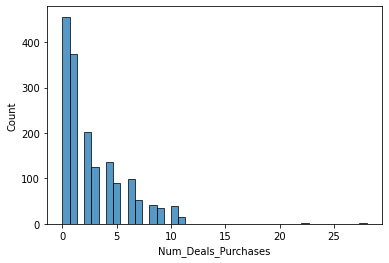

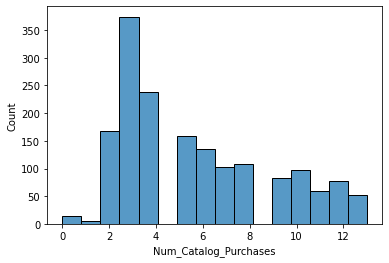

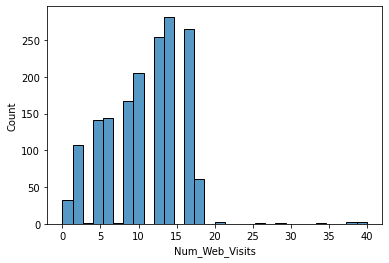

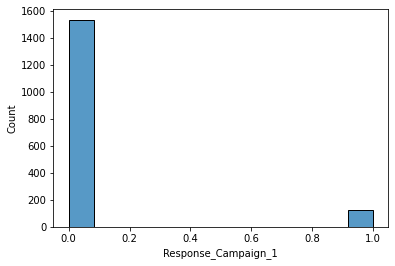

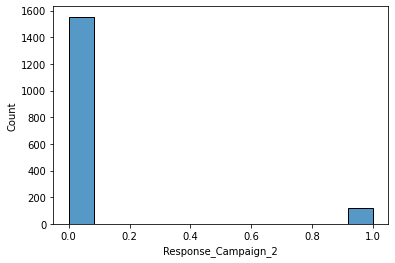

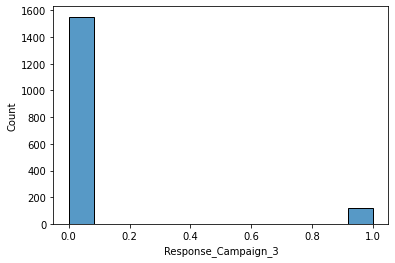

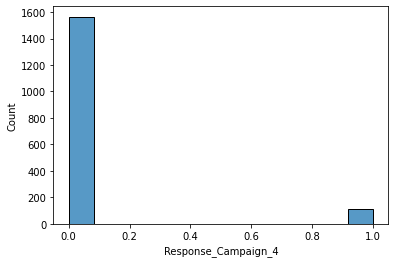

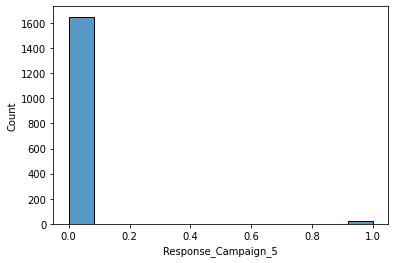

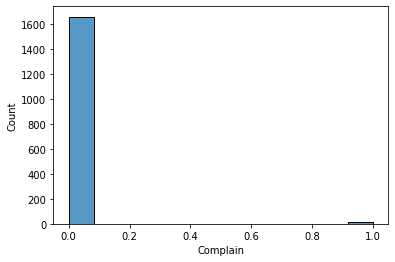

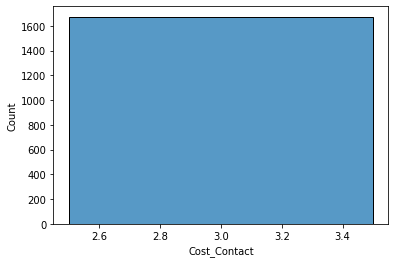

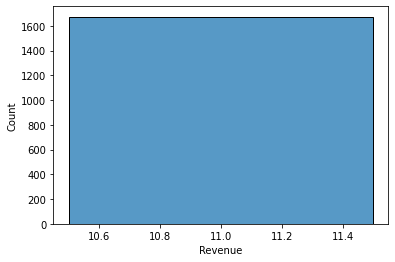

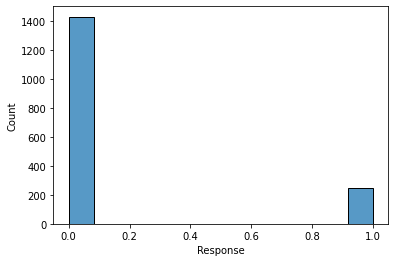

In [4]:
# sns.displot(df["Year_Birth"], kde=True, color='skyblue', stat="probability", discrete=True )
# sns.histplot(data=df["Income"].dropna())

for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(data=df[col])
# df.columns

#### Skewness:

In [5]:
data = df.drop(["ID"], axis=1)
data = data.drop(["Revenue"], axis=1)
data = data.drop(["Cost_Contact"], axis=1)
numeric_col = data.describe().columns
numeric_data = data[numeric_col]

for col in numeric_col:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True) )
 

Year_Birth  skewness: -0.3521297334201921
Income  skewness: 7.916831486203255
Num_of_kids  skewness: 0.5841313250351708
Num_of_Teen  skewness: 0.4129909449000085
Recency  skewness: -0.012307768420328446
Mnt_Fruits  skewness: 1.1829109635956956
Mnt_Meat  skewness: 2.1495184429670813
Mnt_sweet  skewness: 2.1092143754162325
Mnt_Wines  skewness: 1.988342728206097
Mnt_Gold_Products  skewness: 2.218833414968302
Mnt_Fish  skewness: 1.9402486173238092
Num_Web_Purchases  skewness: 2.5125546694750898
Num_Store_Purchases  skewness: 1.5552728492914274
Num_Deals_Purchases  skewness: 2.0657617307381693
Num_Catalog_Purchases  skewness: 0.6997937661170338
Num_Web_Visits  skewness: 0.25966407514401624
Response_Campaign_1  skewness: 3.191823311903448
Response_Campaign_2  skewness: 3.3224579772122715
Response_Campaign_3  skewness: 3.305146751217529
Response_Campaign_4  skewness: 3.5271264290087347
Response_Campaign_5  skewness: 8.359327109203887
Complain  skewness: 10.427719201596041
Response  skewness: 

#### Median and more:

In [6]:
numeric_data.describe()

,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
count,1651.000000,1609.000000,1672.000000,1660.000000,1680.000000,1673.000000,1673.000000,1659.000000,1673.000000,1673.000000,...,1673.000000,1673.000000,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1680.000000
mean,1969.047244,51983.554382,0.454545,0.503614,48.890476,303.676031,25.224148,166.232068,35.998207,26.200239,...,2.650329,5.736402,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,0.148214
std,11.937421,26567.679664,0.538492,0.544011,29.091872,340.672889,38.754356,227.583935,52.995401,40.894498,...,3.022488,3.225084,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.355418
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.500000,34596.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.500000,2.000000,1.000000,...,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,8.000000,...,2.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,67716.000000,1.000000,1.000000,74.000000,508.000000,30.000000,223.000000,47.000000,32.000000,...,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.3 Show and explain attributes correlations.

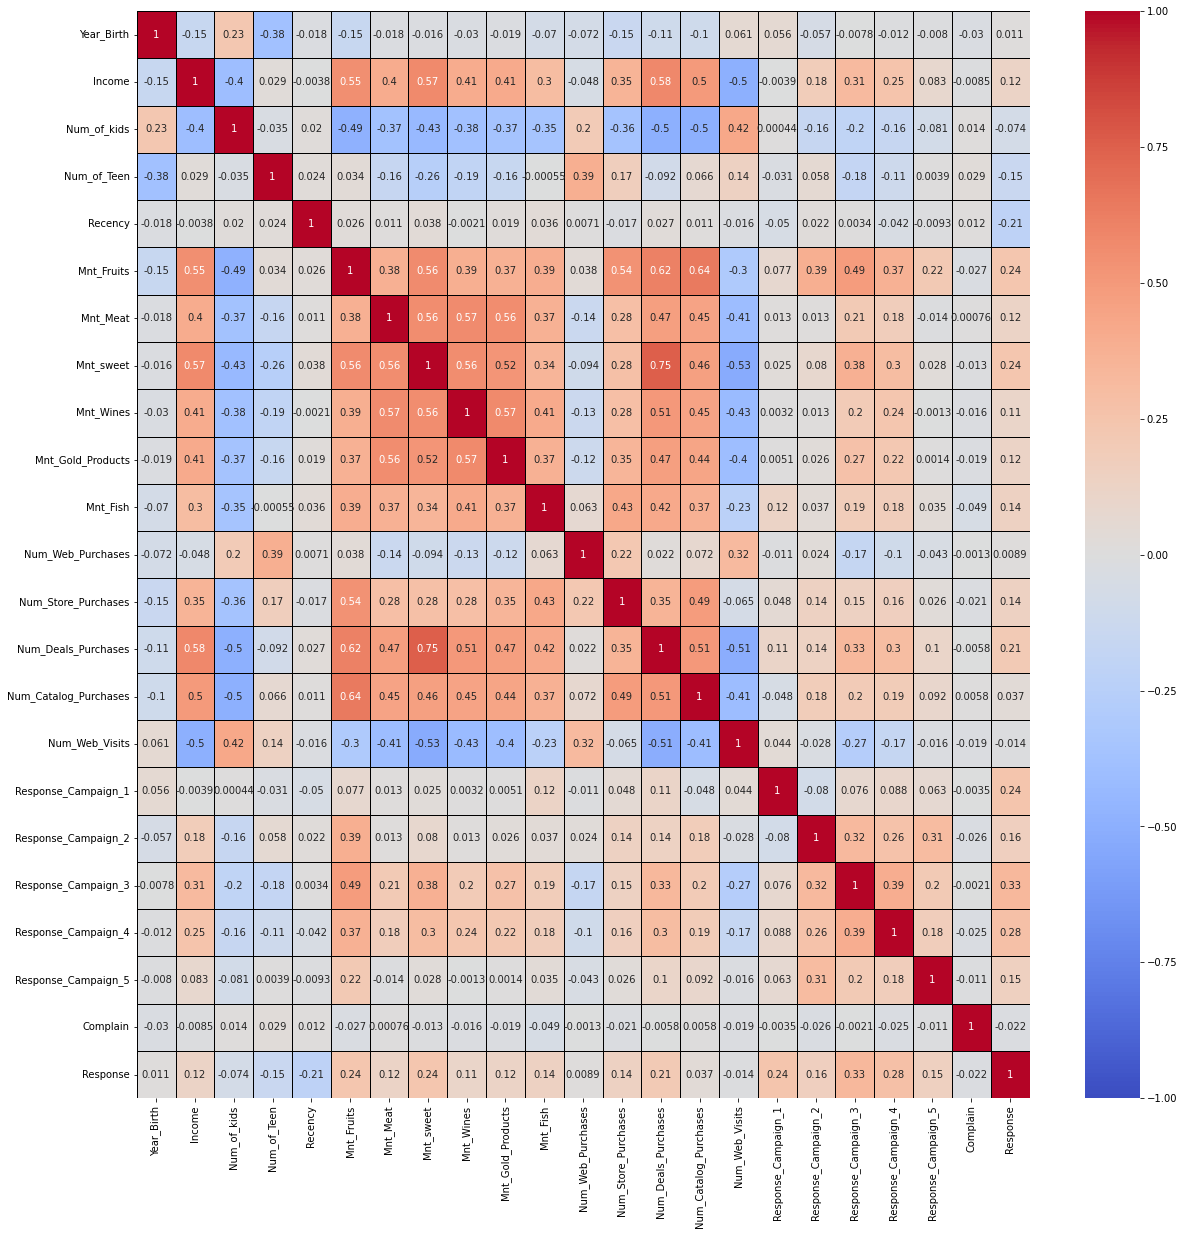

In [7]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center= 0,
cmap= 'coolwarm', linewidths=0.5, linecolor='black')

### 1.4 Show and explain visualizations that present interesting insights from the data, e.g., identify relations, trends, the effect of an attribute on the target variable etc.

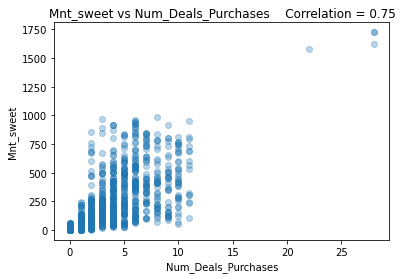

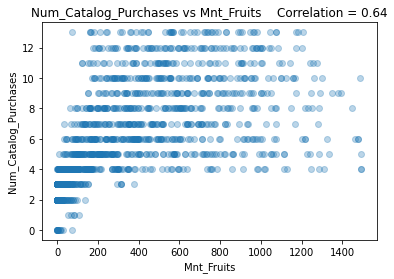

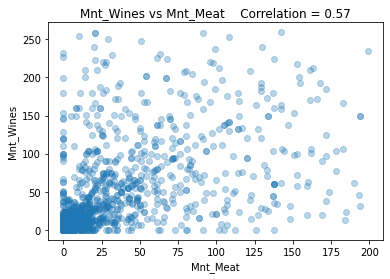

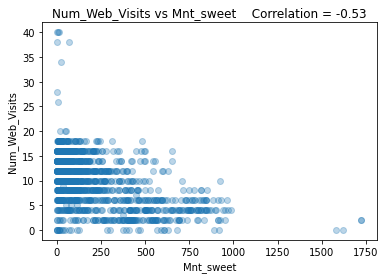

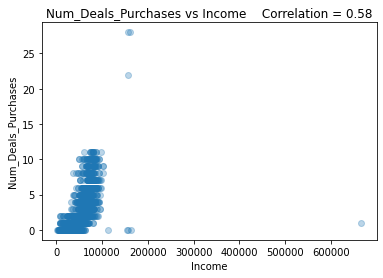

<AxesSubplot:title={'center':'Response_Campaign_3 vs Response      Correlation = 0.33'}>

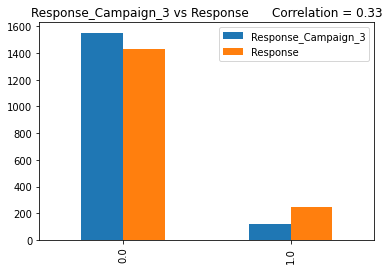

In [8]:
graphs = [("Num_Deals_Purchases","Mnt_sweet", 0.75), ("Mnt_Fruits", "Num_Catalog_Purchases", 0.64), ("Mnt_Meat", "Mnt_Wines", 0.57), ("Mnt_sweet", "Num_Web_Visits", -0.53),("Income", "Num_Deals_Purchases", 0.58)]

for graph1, graph2, corr in graphs:
    plt.scatter(df[graph1], df[graph2], alpha=0.3)
    plt.title(f"{graph2} vs {graph1}    Correlation = {corr}")
    plt.xlabel(graph1)
    plt.ylabel(graph2)
    # plt.savefig(f"{graph2} vs {graph1}    Correlation = {corr}.png", transparent=False, facecolor="white")
    plt.show()

df2 = df[["Response_Campaign_3", "Response"]].copy()
df2.apply(pd.value_counts).plot(kind='bar', title='Response_Campaign_3 vs Response      Correlation = {}'.format(0.33))

#### 1.5 Data cleaning - check for each one of the problems and take care of them properly, e.g., missing values, inconsistent etc.

In [9]:
# under skewness we removed ID, Revenue and Cost--
# Complain col has almost no correlation with any other cols, therefore we'll remove it:
data = df.drop(["ID"], axis=1)
data = data.drop(["Revenue"], axis=1)
data = data.drop(["Cost_Contact"], axis=1)
data = data.drop("Complain", axis=1)
data[data.isnull().sum(axis=1)>6].head(10)


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response
1659,1950.0,Graduation,Together,34026.0,1.0,1.0,05/08/2013,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1662,1958.0,Graduation,Together,53977.0,0.0,1.0,08/06/2013,21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1663,1971.0,Graduation,Single,55239.0,0.0,1.0,14/07/2013,59,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1665,1952.0,Graduation,Together,75278.0,0.0,0.0,29/01/2013,17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1666,1959.0,Master,Together,82576.0,0.0,0.0,01/08/2012,66,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1673,1975.0,Graduation,Single,33249.0,1.0,0.0,20/02/2013,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1675,1990.0,PhD,Married,74214.0,0.0,0.0,26/08/2012,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Data Cleaning:

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

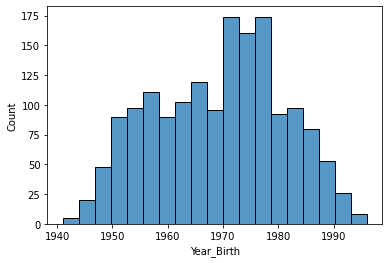

In [10]:
data = data.drop(data[data.isnull().sum(axis=1)> 6].index) # we removed every row with more than 6 missing attributes.
# print(data.shape)
# data.info()
data = data.drop(data[data["Year_Birth"] < 1905].index)
# cols = data.drop(data.columns[data.isnull().sum(axis=0) == 0], axis=1)
# cols.info()
sns.histplot(data["Year_Birth"])

As we saw on the above, Income has negative values, and that does not make sense. Let's examine those negative entries:

In [11]:
negative_income = data[data["Income"] < 0]
negative_income

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response


We assume there was a typo, and so we will take the absolute value of Income for those entries.

In [12]:
for row in negative_income.index:
    data["Income"][row] = abs(data["Income"][row])


As we can see, there are some entries, in which the num of purchases is > 0, where as the number of visits is 0. That does not make sense. The reason for that can be a problem within the website. Therefore, we will fill those entries with the number of purchases, minus the mean of the distance between Num_Web_Purchases, and Num_Web_Visits.

In [13]:
purchase_larger_than_visits = data[(data["Num_Web_Purchases"] >= data["Num_Web_Visits"])]
purchase_larger_than_visits[["Num_Web_Purchases", "Num_Web_Visits"]].head()

,Num_Web_Purchases,Num_Web_Visits
0,15.0,2.0
3,15.0,14.0
4,15.0,0.0
5,15.0,0.0
7,13.0,10.0


In [14]:
num_of_visits_not_0 = data[(data["Num_Web_Purchases"] > data["Num_Web_Visits"]) & data["Num_Web_Visits"] != 0]
mean_distance = (num_of_visits_not_0["Num_Web_Purchases"] - num_of_visits_not_0["Num_Web_Visits"]).mean()

In [15]:
num_of_visits_0 = data[data["Num_Web_Visits"] == 0 & (data["Num_Web_Purchases"] > 0)]

for row in num_of_visits_0.index:
    if num_of_visits_0.loc[row]["Num_Web_Purchases"] > mean_distance + 1:
        data["Num_Web_Visits"][row] = data["Num_Web_Purchases"][row] - mean_distance
    elif num_of_visits_0.loc[row]["Num_Web_Purchases"] == 0:
        pass
    else:
        data["Num_Web_Visits"][row] = 1

data[(data["Num_Web_Purchases"] >= data["Num_Web_Visits"])][["Num_Web_Purchases", "Num_Web_Visits"]].head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\1650826471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Num_Web_Visits"][row] = data["Num_Web_Purchases"][row] - mean_distance
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\1650826471.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Num_Web_Visits"][row] = 1


,Num_Web_Purchases,Num_Web_Visits
0,15.0,2.0
3,15.0,14.0
4,15.0,12.0
5,15.0,12.0
7,13.0,10.0


כעת אנחנו רוצים להשלים את השדות שנת לידה והכנסה, אך מאחר ואין לנו שדות אחרים מלאים שיש ביניהם קורלציה גבוהה,
לא נוכל להשלים את שדות אלו בהתבסס על שדות אחרים, ולכן מאחר ושניהם מתפלגים נורמלית (לפי הגרפים שראינו קודם), נמצא את הממוצע וסטיית התקן של כל שדה, ואז נרגיל ערכים לפי ההתפלגות הנורמלית שמצאנו.

Year_Birth:

(29, 25)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\1428434188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_Birth'][row] = round(np.random.normal(mu_Year_Birth, sigma_Year_Birth))


<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

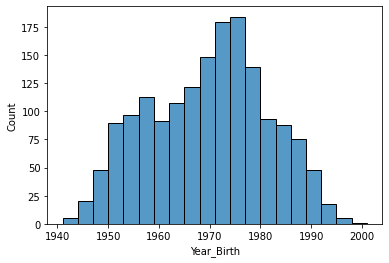

In [16]:
mu_Year_Birth = data["Year_Birth"].mean()
sigma_Year_Birth = data["Year_Birth"].std()

year_birth_missing_values = data[data["Year_Birth"].isnull()]
print(year_birth_missing_values.shape)

for row in year_birth_missing_values.index:
    data['Year_Birth'][row] = round(np.random.normal(mu_Year_Birth, sigma_Year_Birth))

sns.histplot(data=data['Year_Birth'])

Income:

(71, 25)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\40905175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income'][row] = round(np.random.normal(mu_Income, sigma_Income))


<AxesSubplot:xlabel='Income', ylabel='Count'>

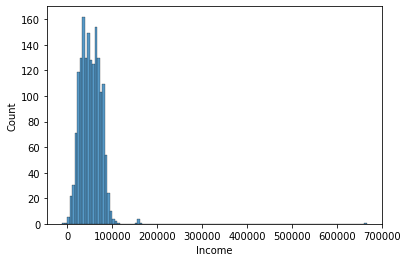

In [17]:
mu_Income = data["Income"].mean()
sigma_Income = data["Income"].std()

year_birth_missing_values = data[data["Income"].isnull()]
print(year_birth_missing_values.shape)

for row in year_birth_missing_values.index:
    data['Income'][row] = round(np.random.normal(mu_Income, sigma_Income))

sns.histplot(data=data['Income'])

<AxesSubplot:xlabel='Status', ylabel='Count'>

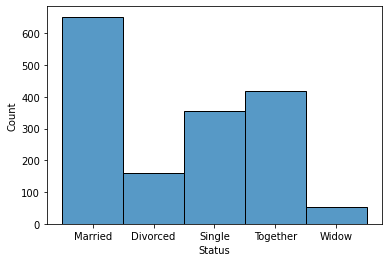

In [18]:
data["Status"] = data["Status"].replace("Alone", "Single")
plt.figure(1)
sns.histplot(data["Status"].dropna())

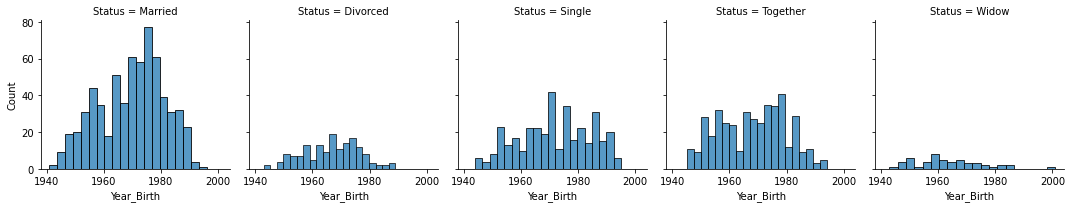

In [19]:
g = sns.FacetGrid(data, col='Status')
g.map(sns.histplot, 'Year_Birth', bins=20);

Education:

In [20]:
new = data[["Income", "Education"]].copy()
new.head(10)

,Income,Education
0,38372.0,Graduation
1,1730.0,Graduation
2,8028.0,Graduation
3,67309.0,2n Cycle
4,160803.0,PhD
5,157243.0,PhD
6,4023.0,PhD
7,50898.0,Master
8,54108.0,Master
9,60839.0,2n Cycle


In [21]:
for level in df["Education"].dropna().unique():
    print(f"Mean of {level} is {df.loc[df['Education']== level, 'Income'].mean()}")

Mean of Graduation is 52768.73392181589
Mean of 2n Cycle is 48143.27272727273
Mean of PhD is 55919.15730337079
Mean of Master is 51978.173431734314
Mean of Basic is 19959.565217391304


now we will fill missing education entries via the following condition:

* Income >= 55k           PhD
* 25k < Income < 55k      Graduation 
* Income < 25k            Basic

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\3144511651.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'][row] = edu


<AxesSubplot:xlabel='Education', ylabel='Count'>

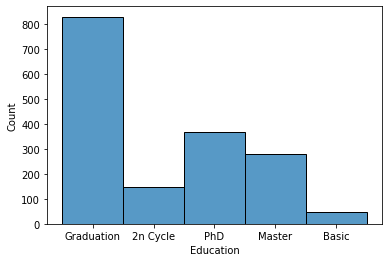

In [22]:
rows_with_missing_edu = data[data["Education"].isnull()]

for row in rows_with_missing_edu.index:
    edu = ''
    if data["Income"][row] >= 55000:
        edu = 'PhD'
    elif data["Income"][row] < 25000:
        edu = 'Basic'
    else:
        edu = "Graduation"

    data['Education'][row] = edu

sns.histplot(data=data['Education'])


Now we will try to fill missing entried in the Status attribute. 

For those which are missing both kids or teens attributes, we will fill with Married (The Majority):

In [23]:
missing_status_kids_teens = 2022 - data[data["Status"].isnull() & (data["Num_of_kids"].isnull() & data["Num_of_Teen"].isnull())]["Year_Birth"]
missing_status_kids_teens


502     44.0
509     41.0
634     32.0
936     55.0
1151    59.0
1464    30.0
1502    60.0
1639    48.0
Name: Year_Birth, dtype: float64

In [24]:
for row in missing_status_kids_teens.index:
    data.loc[row,["Status"]] = "Married"
data.iloc[missing_status_kids_teens.index,:]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response
502,1978.0,Graduation,Married,38177.0,NaN,NaN,13/10/2012,0,80.0,1.0,...,2.0,1.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0
509,1981.0,Graduation,Married,44936.0,NaN,NaN,21/12/2013,12,357.0,35.0,...,6.0,2.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0
634,1990.0,PhD,Married,93742.0,NaN,NaN,15/05/2014,21,14.0,0.0,...,2.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0
936,1967.0,Graduation,Married,48814.0,NaN,NaN,22/12/2012,51,741.0,68.0,...,4.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1151,1963.0,Graduation,Married,51234.0,NaN,NaN,31/12/2012,70,12.0,4.0,...,2.0,0.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0
1466,1978.0,Graduation,Married,33039.0,1.0,0.0,09/09/2013,4,30.0,8.0,...,2.0,0.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0
1504,1987.0,Graduation,Married,7500.0,0.0,0.0,09/01/2013,94,0.0,2.0,...,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0
1641,1983.0,Graduation,Single,101970.0,0.0,0.0,12/03/2013,69,722.0,27.0,...,6.0,8.0,13.0,4.0,0.0,1.0,1.0,1.0,0.0,1


Now we will examine the rows which have a value under Teens or Kids

In [25]:
data[data["Status"].isnull() & ( data["Num_of_kids"].notnull() | data["Num_of_Teen"].notnull())].head()

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response
38,1951.0,Graduation,NaN,40689.0,0.0,1.0,18/03/2013,69,270.0,3.0,...,7.0,1.0,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0
72,1963.0,Master,NaN,48721.0,1.0,1.0,13/05/2013,50,81.0,18.0,...,4.0,2.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0
124,1973.0,PhD,NaN,48432.0,0.0,1.0,18/10/2012,3,322.0,3.0,...,7.0,1.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,1
148,1962.0,Graduation,NaN,63887.0,0.0,1.0,08/09/2012,38,897.0,23.0,...,9.0,6.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0
150,1973.0,PhD,NaN,48432.0,0.0,1.0,18/10/2012,3,322.0,3.0,...,7.0,1.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
no_kids = data.loc[(data["Status"].isnull()) & (data["Num_of_kids"] == 0) & (data["Num_of_Teen"] == 0)]
no_kids

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response
397,1957.0,Master,NaN,65487.0,0.0,0.0,10/01/2014,48,240.0,67.0,...,3.0,5.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0
916,1993.0,Graduation,NaN,79244.0,0.0,0.0,19/12/2012,58,471.0,102.0,...,4.0,10.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,1
1009,1963.0,Master,NaN,38620.0,0.0,0.0,11/05/2013,56,112.0,17.0,...,2.0,5.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0
1200,1959.0,Graduation,NaN,52332.0,0.0,0.0,28/08/2013,63,212.0,5.0,...,3.0,2.0,6.0,8.0,0.0,1.0,0.0,0.0,0.0,0
1278,1987.0,Graduation,NaN,81361.0,0.0,0.0,25/02/2014,18,163.0,23.0,...,3.0,10.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0
1486,1965.0,PhD,NaN,84618.0,0.0,0.0,22/11/2013,96,684.0,100.0,...,6.0,9.0,10.0,4.0,0.0,0.0,1.0,0.0,0.0,0


For those who don't have kids, we will fill their Status to Single

In [27]:
for row in no_kids.index:
    data.loc[row,["Status"]] = "Single"
data.iloc[no_kids.index,:]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response
397,1957.0,Master,Single,65487.0,0.0,0.0,10/01/2014,48,240.0,67.0,...,3.0,5.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0
916,1993.0,Graduation,Single,79244.0,0.0,0.0,19/12/2012,58,471.0,102.0,...,4.0,10.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,1
1009,1963.0,Master,Single,38620.0,0.0,0.0,11/05/2013,56,112.0,17.0,...,2.0,5.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0
1201,1961.0,Graduation,Single,82014.0,0.0,0.0,20/08/2012,48,980.0,37.0,...,3.0,6.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,1
1280,1952.0,Graduation,Single,75127.0,0.0,0.0,22/05/2014,92,203.0,35.0,...,2.0,11.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0
1488,1979.0,Graduation,Together,75507.0,0.0,0.0,02/05/2014,56,709.0,93.0,...,8.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0


We will fill the rest with Married, as it is the majority

In [28]:
have_kids = data.loc[(data["Status"].isnull()) & ((data["Num_of_kids"] != 0) | (data["Num_of_Teen"] != 0))]

for row in have_kids.index:
    data.loc[row,["Status"]] = "Married"
data.iloc[have_kids.index,:].head()


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response
38,1951.0,Graduation,Married,40689.0,0.0,1.0,18/03/2013,69,270.0,3.0,...,7.0,1.0,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0
72,1963.0,Master,Married,48721.0,1.0,1.0,13/05/2013,50,81.0,18.0,...,4.0,2.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0
124,1973.0,PhD,Married,48432.0,0.0,1.0,18/10/2012,3,322.0,3.0,...,7.0,1.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,1
148,1962.0,Graduation,Married,63887.0,0.0,1.0,08/09/2012,38,897.0,23.0,...,9.0,6.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0
150,1973.0,PhD,Married,48432.0,0.0,1.0,18/10/2012,3,322.0,3.0,...,7.0,1.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
cols = data.drop(data.columns[data.isnull().sum(axis=0) == 0], axis=1)
cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1679
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Num_of_kids          1663 non-null   float64
 1   Num_of_Teen          1651 non-null   float64
 2   Mnt_sweet            1657 non-null   float64
 3   Num_Web_Purchases    1649 non-null   float64
 4   Response_Campaign_1  1660 non-null   float64
dtypes: float64(5)
memory usage: 142.9 KB


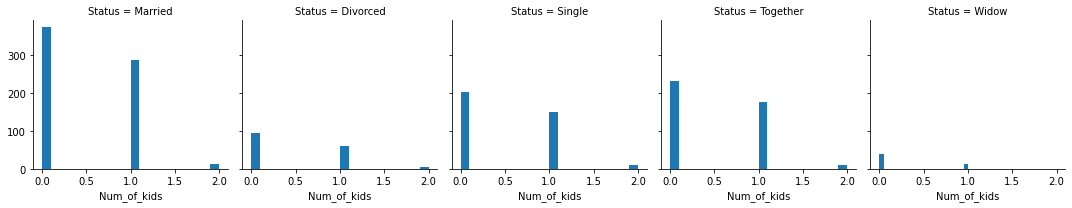

In [30]:
g = sns.FacetGrid(data, col='Status')
g.map(plt.hist, 'Num_of_kids', bins=20);

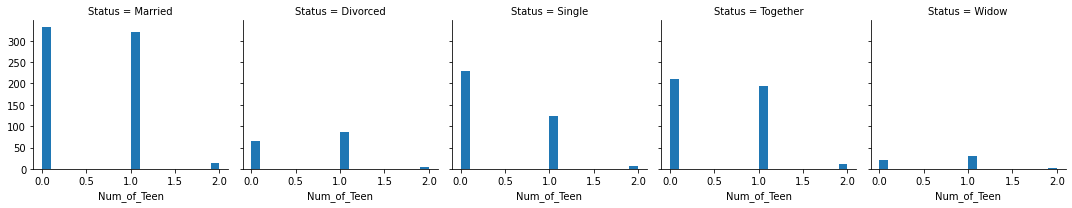

In [31]:
g = sns.FacetGrid(data, col='Status')
g.map(plt.hist, 'Num_of_Teen', bins=20);

In [32]:
null_kids = data[data["Num_of_kids"].isnull()]

In [33]:
data[(data["Num_of_Teen"] > 0) & (data["Year_Birth"] >= 1990)][["Year_Birth", "Num_of_Teen"]]

,Year_Birth,Num_of_Teen
1144,2001.0,1.0


In [34]:
no_kids = data[data["Num_of_kids"].isnull()]

for row in no_kids.index:
    data["Num_of_kids"][row] = np.random.choice([0,1,2], p=[0.5,0.47, 0.03])

no_teens = data[data["Num_of_Teen"].isnull()]

for row in no_teens.index:
    data["Num_of_Teen"][row] = np.random.choice([0,1,2], p=[0.5,0.47, 0.03])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\119377197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Num_of_kids"][row] = np.random.choice([0,1,2], p=[0.5,0.47, 0.03])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\119377197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Num_of_Teen"][row] = np.random.choice([0,1,2], p=[0.5,0.47, 0.03])


Now after we filled the missing values under kids and teens, we will combine those attributes, as their meaning is similar:

In [35]:
data["Children"] = data["Num_of_kids"] + data["Num_of_Teen"]
data = data.drop(["Num_of_kids"], axis=1)
data = data.drop(["Num_of_Teen"], axis=1)
data.head()

,Year_Birth,Education,Status,Income,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Children
0,1979.0,Graduation,Married,38372.0,06/01/2013,42,1.0,1.0,1725.0,1.0,...,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1.0
1,1971.0,Graduation,Divorced,1730.0,18/05/2014,65,1.0,1.0,3.0,1.0,...,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,1991.0,Graduation,Single,8028.0,18/09/2012,62,73.0,18.0,66.0,7.0,...,1.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,1967.0,2n Cycle,Together,67309.0,23/01/2013,76,515.0,47.0,181.0,149.0,...,6.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0,2.0
4,1982.0,PhD,Married,160803.0,04/08/2012,21,55.0,16.0,1622.0,17.0,...,28.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0,0.0


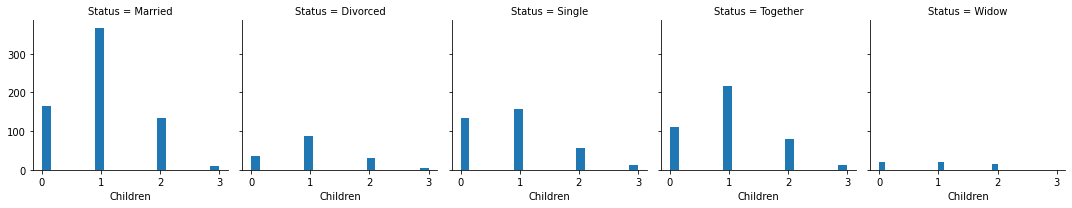

In [36]:
g = sns.FacetGrid(data, col='Status')
g.map(plt.hist, 'Children', bins=20);


In [37]:
cols = data.drop(data.columns[data.isnull().sum(axis=0) == 0], axis=1)
cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1679
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mnt_sweet            1657 non-null   float64
 1   Num_Web_Purchases    1649 non-null   float64
 2   Response_Campaign_1  1660 non-null   float64
dtypes: float64(3)
memory usage: 116.8 KB


Now we will fill the missing values under "Mnt_sweet". Because only 14 values are missing, we will fill them with the median.

In [38]:
data["Mnt_sweet"] = data["Mnt_sweet"].fillna(data["Mnt_sweet"].median())

In [39]:
cols = data.drop(data.columns[data.isnull().sum(axis=0) == 0], axis=1)
cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1679
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Num_Web_Purchases    1649 non-null   float64
 1   Response_Campaign_1  1660 non-null   float64
dtypes: float64(2)
memory usage: 103.7 KB


<AxesSubplot:xlabel='Mnt_sweet', ylabel='Count'>

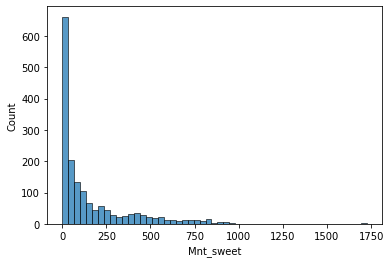

In [40]:
sns.histplot(data["Mnt_sweet"])

Now we will fill the missing values under "Num_web_Purchases". First we will examine the data.

In [41]:
missing_purchases = data[data["Num_Web_Purchases"].isnull()][["Num_Web_Visits", "Num_Web_Purchases"]]
indecies = missing_purchases.index
for row in missing_purchases.index:
    data["Num_Web_Purchases"][row] = data["Num_Web_Visits"][row] + mean_distance


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\128775219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Num_Web_Purchases"][row] = data["Num_Web_Visits"][row] + mean_distance


In [42]:
cols = data.drop(data.columns[data.isnull().sum(axis=0) == 0], axis=1)
cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1679
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Response_Campaign_1  1660 non-null   float64
dtypes: float64(1)
memory usage: 90.6 KB


<AxesSubplot:xlabel='Response_Campaign_1', ylabel='Count'>

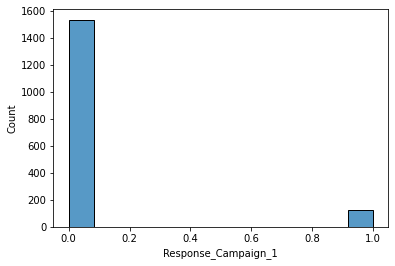

In [43]:
sns.histplot(data["Response_Campaign_1"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20872\4205817925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Response_Campaign_1"][row] = 0


<AxesSubplot:xlabel='Response_Campaign_1', ylabel='Count'>

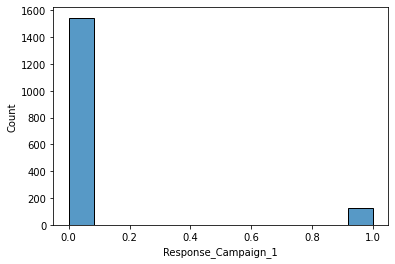

In [44]:
missing_response_1 = data[data["Response_Campaign_1"].isnull()]

for row in missing_response_1.index:
    data["Response_Campaign_1"][row] = 0

sns.histplot(data["Response_Campaign_1"])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1679
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1671 non-null   float64
 1   Education              1671 non-null   object 
 2   Status                 1671 non-null   object 
 3   Income                 1671 non-null   float64
 4   Registration_date      1671 non-null   object 
 5   Recency                1671 non-null   int64  
 6   Mnt_Fruits             1671 non-null   float64
 7   Mnt_Meat               1671 non-null   float64
 8   Mnt_sweet              1671 non-null   float64
 9   Mnt_Wines              1671 non-null   float64
 10  Mnt_Gold_Products      1671 non-null   float64
 11  Mnt_Fish               1671 non-null   float64
 12  Num_Web_Purchases      1671 non-null   float64
 13  Num_Store_Purchases    1671 non-null   float64
 14  Num_Deals_Purchases    1671 non-null   float64
 15  Num_

#### Discretization:

We will performe discretization on "Year_Birth", and "Income", as it will work well against odd values we didn't want to remove. Also, in those attributes, we care about the range of the values, and not we do not care about a specific value of a certain entry.

If so, we will first perform discretization on "Year_Birth":

In [46]:
data["Year_Birth"] = pd.cut(data["Year_Birth"], bins = [1900, 1955,1965, 1975, data["Year_Birth"].max()], labels=[0,1,2,3])
print(data["Year_Birth"].value_counts().sum())
data["Year_Birth"].value_counts()

1671


3    540
2    506
1    365
0    260
Name: Year_Birth, dtype: int64

And now, we will perform it on "Income":

In [47]:
data["Income"] = pd.cut(data["Income"], bins = [data["Income"].min()-1,40000, 50000,60000,80000 , data["Income"].max()], labels=[0,1,2,3,4])
print(data["Income"].value_counts().sum())
data["Income"].value_counts()

1671


0    566
3    451
1    258
2    229
4    167
Name: Income, dtype: int64

In [48]:
data.head(10)
data[data["Income"].isnull()]


,Year_Birth,Education,Status,Income,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Children


In [ ]:
data.to_csv("train_before_normalization.csv")

Normalization:

In [49]:
data["Registration_date"] = pd.to_datetime(data["Registration_date"], format='%d/%m/%Y')
data["Registration_date"] = data["Registration_date"].apply(lambda x: x.value)

for feature in ["Registration_date", "Recency", "Mnt_Fruits", "Mnt_Meat", "Mnt_sweet", "Mnt_Wines", "Mnt_Gold_Products", "Mnt_Fish", "Num_Web_Purchases", "Num_Store_Purchases", "Num_Deals_Purchases", "Num_Catalog_Purchases", "Num_Web_Visits", "Children"]:
    scaler = MinMaxScaler()
    scaler.fit(pd.DataFrame(data[feature]))
    data[feature] = scaler.transform(pd.DataFrame(data[feature]))

data.head()

,Year_Birth,Education,Status,Income,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Children
0,3,Graduation,Married,1,0.228898,0.424242,0.000670,0.005025,1.000000,0.003861,...,1.000000,0.000000,0.05,0.0,0.0,0.0,0.0,0.0,0,0.333333
1,2,Graduation,Divorced,0,0.939914,0.656566,0.000670,0.005025,0.001160,0.003861,...,0.000000,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,0,0.000000
2,3,Graduation,Single,0,0.071531,0.626263,0.048895,0.090452,0.037703,0.027027,...,0.035714,0.000000,0.95,0.0,0.0,0.0,0.0,0.0,0,0.000000
3,2,2n Cycle,Together,3,0.253219,0.767677,0.344943,0.236181,0.104408,0.575290,...,0.214286,0.692308,0.35,0.0,0.0,0.0,0.0,0.0,0,0.666667
4,3,PhD,Married,4,0.007153,0.212121,0.036839,0.080402,0.940255,0.065637,...,1.000000,0.076923,0.30,0.0,0.0,0.0,0.0,0.0,0,0.000000


#### PCA:
Now we would like to run pca in order to reduce the dimentions of our data. in order to do so, we have to transform the rest of our data to numeric data.

If so, let's transform Education & Status fields to numric:

In [50]:
print(data["Education"].unique(), "--->", list(range(len(data["Education"].unique()))))
print(data["Status"].unique(), "--->", list(range(len(data["Status"].unique()))))

['Graduation' '2n Cycle' 'PhD' 'Master' 'Basic'] ---> [0, 1, 2, 3, 4]
['Married' 'Divorced' 'Single' 'Together' 'Widow'] ---> [0, 1, 2, 3, 4]


In [51]:
data["Education"] = data["Education"].replace(data["Education"].unique(),range(len(data["Education"].unique())))
data["Status"] = data["Status"].replace(data["Status"].unique(),range(len(data["Status"].unique())))

Now we are ready to perform PCA

In [52]:
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(data, y='Response')
data_pca = pd.DataFrame(pca.transform(data))
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.811314,-1.503675,-1.376469,-0.602413,-0.004040,-0.215162,-0.142739,0.062613,-0.014113,-0.058522,...,0.171536,-0.267556,-0.343885,-0.464163,-0.624649,-0.156795,0.978971,0.745413,0.330166,0.140930
1,-1.564401,-0.351652,-1.310073,0.536026,-0.106786,0.196559,0.225928,-0.128622,0.025344,-0.117372,...,-0.092246,-0.331856,-0.438333,-0.156589,-0.391015,0.033032,0.431527,-0.644531,0.110714,-0.430836
2,-1.701429,0.565879,-1.640164,-0.485051,0.049346,-0.489105,0.001548,0.110351,-0.037837,0.044203,...,0.024143,-0.214314,-0.394545,-0.157464,-0.369759,0.017620,0.445546,-0.546333,0.038753,-0.373408
3,1.414716,1.443073,-0.174974,-0.614272,-0.359530,-0.477621,-0.138631,0.242308,0.243131,0.070258,...,0.201280,-0.322481,-0.043253,-0.010726,-0.261836,0.041910,0.336721,-0.238912,-0.131820,-0.038222
4,1.668693,-1.618311,0.854802,-1.804518,-0.213471,-0.198491,-0.503451,0.322985,0.050441,-0.111115,...,0.221335,-0.263989,-0.361379,-0.365894,-0.615971,-0.173490,0.998334,0.355418,0.416506,-0.050251


In [53]:
pca.explained_variance_ratio_

array([0.30440196, 0.23308978, 0.21907386, 0.13593421, 0.02201016,
       0.01243723, 0.01201756, 0.01031282, 0.00983487, 0.00741265,
       0.00572656, 0.00526487, 0.00462747, 0.003773  , 0.00231788,
       0.00219536, 0.00188184, 0.00161095, 0.00151649, 0.00146897,
       0.00128742, 0.00073042, 0.0006722 ])

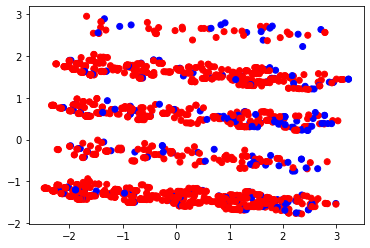

In [54]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(data_pca[0], data_pca[1], c = data['Response'].map(colordict))

In [55]:
data.to_csv("train.csv")